In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('image_bins_stats_lungs1.csv')
data.shape

(2484, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,77.433079,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,79.728951,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,68.987348,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,94.638788,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,68.762015,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722,15567,4,7683,12061,1,8864,16634,77.433079,0.202929,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,6556,13701,25,9956,9437,0,12114,13747,79.728951,5.447851,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,10512,12249,1,11502,7743,2,9619,13908,68.987348,36.388358,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,7987,11854,2,10419,11895,9,11931,11439,94.638788,15.529948,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,7761,14159,4,10898,10560,9,9153,12992,68.762015,4.809379,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722.0,15567.0,4.0,7683.0,12061.0,1.0,8864.0,16634.0,77.433079,0.202929,...,29.266700,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0.0
1,6556.0,13701.0,25.0,9956.0,9437.0,0.0,12114.0,13747.0,79.728951,5.447851,...,33.538220,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0.0
2,10512.0,12249.0,1.0,11502.0,7743.0,2.0,9619.0,13908.0,68.987348,36.388358,...,25.225216,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0.0
3,7987.0,11854.0,2.0,10419.0,11895.0,9.0,11931.0,11439.0,94.638788,15.529948,...,34.516185,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0.0
4,7761.0,14159.0,4.0,10898.0,10560.0,9.0,9153.0,12992.0,68.762015,4.809379,...,32.137213,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,4950.0,16941.0,0.0,9161.0,12953.0,0.0,8179.0,13352.0,59.237576,0.162269,...,25.786782,40.580961,22.391613,0.000000,6.716628,15.733760,0.000000,45.642531,33.442984,1.0
2480,6149.0,11217.0,1.0,10795.0,14813.0,0.0,7335.0,15226.0,89.067328,2.286262,...,30.321740,38.459722,19.856163,0.000000,7.773049,11.227728,0.000000,40.091211,34.380787,1.0
2481,8157.0,8955.0,3.0,8384.0,14395.0,0.0,8516.0,17126.0,110.959421,12.390955,...,30.361398,40.138990,24.611149,8.738112,13.053664,9.750293,0.000000,32.766410,38.228325,1.0
2482,6614.0,11508.0,3.0,10639.0,14738.0,0.0,7195.0,14839.0,90.745086,4.628172,...,35.209322,29.755901,22.888434,14.582557,13.300365,13.399057,0.000000,41.964578,34.453684,1.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1733, 104), (743, 104))

In [8]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([2.78393493e+02, 1.01513697e+01, 4.88574811e+01, 6.61234379e+00,
        5.25160133e+02, 2.46638927e+01, 1.05918506e+01, 2.26045880e+01,
        4.52130422e+01, 1.18244288e+02, 1.05100483e+02, 5.52099145e+01,
        3.34785117e+02, 3.01654715e+02, 2.53701614e+00, 9.98255610e+01,
        8.97913730e+01, 5.89120021e+00, 2.79788679e+02, 6.39555554e+01,
        5.62911363e-01, 1.98179370e+02, 5.77484367e+02, 2.84998651e+01,
        1.14781781e+02, 9.12899173e+00, 2.83523940e+02, 5.17879774e+01,
        2.14036394e+00, 1.98657185e+02, 6.14782321e+02, 4.87517893e+01,
        1.77577549e+02, 1.26552441e+01, 2.85544338e+02, 4.47470867e+01,
        6.50685574e+00, 1.97089345e+02, 5.09967445e+02, 7.03993663e+01,
        3.32141761e+02, 1.56174638e+02, 1.53401928e+02, 2.25915637e+02,
        2.94692486e+02, 6.05682275e+01, 3.21723166e+01, 6.68773558e+01,
        6.04353185e+02, 2.38869175e+02, 2.57891188e+02, 4.37268404e+01,
        1.93672020e+01, 1.15263005e+02, 6.35308010e+01, 1.471049

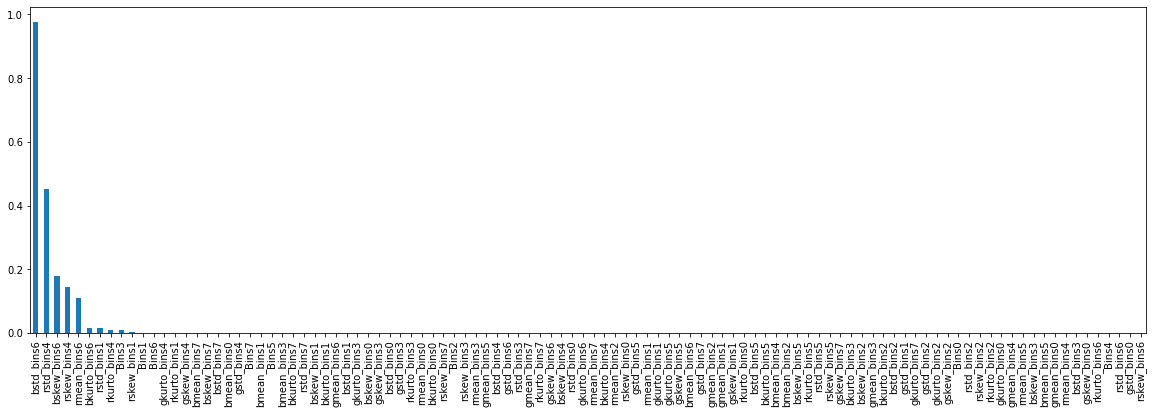

In [9]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [10]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['Bins0', 'Bins4', 'rmean_bins4', 'rmean_bins5', 'rstd_bins2',
       'rstd_bins6', 'rskew_bins2', 'rskew_bins6', 'rkurto_bins2',
       'rkurto_bins6', 'gmean_bins0', 'gmean_bins4', 'gstd_bins0',
       'gskew_bins0', 'gskew_bins2', 'gkurto_bins0', 'gkurto_bins2',
       'bmean_bins5', 'bstd_bins3', 'bskew_bins3'],
      dtype='object')

In [11]:
# I keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [12]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  39


In [13]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1733, 65), (743, 65))

In [14]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [15]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((1733, 20), (743, 20))

In [18]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [17]:
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9855457266735572
Test set
Random Forests roc-auc: 0.9705852417302799
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       350
         1.0       0.91      0.94      0.92       393

    accuracy                           0.92       743
   macro avg       0.92      0.92      0.92       743
weighted avg       0.92      0.92      0.92       743

Confusion Matrix:
[[313  37]
 [ 23 370]]
Metrics:
Accuracy: 0.919
F1 Score: 0.925
Precision: 0.909
Recall: 0.941
After Cross Validation:
Accuracy: 90.71 %
Standard Deviation: 1.86 %


In [18]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9823952642388285
Test set
Random Forests roc-auc: 0.9665648854961832
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       350
         1.0       0.90      0.95      0.93       393

    accuracy                           0.92       743
   macro avg       0.92      0.92      0.92       743
weighted avg       0.92      0.92      0.92       743

Confusion Matrix:
[[310  40]
 [ 19 374]]
Metrics:
Accuracy: 0.921
F1 Score: 0.927
Precision: 0.903
Recall: 0.952
After Cross Validation:
Accuracy: 91.17 %
Standard Deviation: 2.09 %


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [20]:
run_logistic(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9812435400083224
Test set
Logistic Regression roc-auc: 0.9738131588513268
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       350
         1.0       0.96      0.98      0.97       393

    accuracy                           0.97       743
   macro avg       0.97      0.97      0.97       743
weighted avg       0.97      0.97      0.97       743

Confusion Matrix:
[[334  16]
 [  9 384]]
Metrics:
Accuracy: 0.966
F1 Score: 0.968
Precision: 0.960
Recall: 0.977
After Cross Validation:
Accuracy: 95.85 %
Standard Deviation: 1.33 %


In [21]:
run_logistic(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9567150355047854
Test set
Logistic Regression roc-auc: 0.9553326063249727
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       350
         1.0       0.89      0.94      0.91       393

    accuracy                           0.91       743
   macro avg       0.91      0.90      0.91       743
weighted avg       0.91      0.91      0.91       743

Confusion Matrix:
[[304  46]
 [ 24 369]]
Metrics:
Accuracy: 0.906
F1 Score: 0.913
Precision: 0.889
Recall: 0.939
After Cross Validation:
Accuracy: 90.02 %
Standard Deviation: 1.82 %


In [22]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [23]:
run_kernel_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.8879471656576775
Test set
Kernel SVM roc-auc: 0.894729189385678
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80       350
         1.0       0.79      0.90      0.84       393

    accuracy                           0.82       743
   macro avg       0.83      0.82      0.82       743
weighted avg       0.83      0.82      0.82       743

Confusion Matrix:
[[258  92]
 [ 41 352]]
Metrics:
Accuracy: 0.821
F1 Score: 0.841
Precision: 0.793
Recall: 0.896
After Cross Validation:
Accuracy: 79.92 %
Standard Deviation: 3.75 %


In [24]:
run_kernel_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.9120716270453844
Test set
Kernel SVM roc-auc: 0.9045583424209379
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       350
         1.0       0.73      0.84      0.78       393

    accuracy                           0.76       743
   macro avg       0.76      0.75      0.75       743
weighted avg       0.76      0.76      0.75       743

Confusion Matrix:
[[230 120]
 [ 62 331]]
Metrics:
Accuracy: 0.755
F1 Score: 0.784
Precision: 0.734
Recall: 0.842
After Cross Validation:
Accuracy: 74.96 %
Standard Deviation: 2.77 %


In [25]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [26]:
run_knn(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       350
         1.0       0.85      0.93      0.89       393

    accuracy                           0.88       743
   macro avg       0.88      0.87      0.88       743
weighted avg       0.88      0.88      0.88       743

Confusion Matrix:
[[285  65]
 [ 26 367]]
Metrics:
Accuracy: 0.878
F1 Score: 0.890
Precision: 0.850
Recall: 0.934
After Cross Validation:
Accuracy: 86.38 %
Standard Deviation: 2.55 %


In [27]:
run_knn(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       350
         1.0       0.78      0.83      0.81       393

    accuracy                           0.79       743
   macro avg       0.79      0.79      0.79       743
weighted avg       0.79      0.79      0.79       743

Confusion Matrix:
[[259  91]
 [ 65 328]]
Metrics:
Accuracy: 0.790
F1 Score: 0.808
Precision: 0.783
Recall: 0.835
After Cross Validation:
Accuracy: 78.76 %
Standard Deviation: 2.80 %


In [29]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [30]:
run_decision_tree(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.8837295528898582
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       350
         1.0       0.87      0.92      0.89       393

    accuracy                           0.89       743
   macro avg       0.89      0.88      0.88       743
weighted avg       0.89      0.89      0.89       743

Confusion Matrix:
[[298  52]
 [ 33 360]]
Metrics:
Accuracy: 0.886
F1 Score: 0.894
Precision: 0.874
Recall: 0.916
After Cross Validation:
Accuracy: 89.85 %
Standard Deviation: 0.96 %


In [31]:
run_decision_tree(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.8778371501272265
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       350
         1.0       0.88      0.90      0.89       393

    accuracy                           0.88       743
   macro avg       0.88      0.88      0.88       743
weighted avg       0.88      0.88      0.88       743

Confusion Matrix:
[[301  49]
 [ 41 352]]
Metrics:
Accuracy: 0.879
F1 Score: 0.887
Precision: 0.878
Recall: 0.896
After Cross Validation:
Accuracy: 88.98 %
Standard Deviation: 1.74 %


In [32]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [33]:
run_naive_bayes(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       350
         1.0       0.87      0.90      0.89       393

    accuracy                           0.88       743
   macro avg       0.88      0.87      0.88       743
weighted avg       0.88      0.88      0.88       743

Confusion Matrix:
[[296  54]
 [ 38 355]]
Metrics:
Accuracy: 0.876
F1 Score: 0.885
Precision: 0.868
Recall: 0.903
After Cross Validation:
Accuracy: 86.67 %
Standard Deviation: 2.61 %


In [34]:
run_naive_bayes(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5535229606561338
Test set
Kernel SVM roc-auc: 0.5367066521264995
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       350
         1.0       0.87      0.91      0.89       393

    accuracy                           0.88       743
   macro avg       0.88      0.88      0.88       743
weighted avg       0.88      0.88      0.88       743

Confusion Matrix:
[[297  53]
 [ 36 357]]
Metrics:
Accuracy: 0.880
F1 Score: 0.889
Precision: 0.871
Recall: 0.908
After Cross Validation:
Accuracy: 86.85 %
Standard Deviation: 2.58 %


In [16]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       350
         1.0       0.95      0.98      0.96       393

    accuracy                           0.96       743
   macro avg       0.96      0.96      0.96       743
weighted avg       0.96      0.96      0.96       743

Confusion Matrix:
[[328  22]
 [  9 384]]
Metrics:
Accuracy: 0.958
F1 Score: 0.961
Precision: 0.946
Recall: 0.977
After Cross Validation:


In [ ]:
run_linear_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)